#### 6-1. 프로젝트: Vocabulary Size를 변경해서 시도해보기


In [38]:
import tensorflow as tf
import seaborn as sns
import sklearn
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

- 위 단계에서 [5000, 10000, None] 으로 제시된 num_words를 다양하게 바꾸어 가며 성능을 확인해보세요. 변화된 단어 수에 따른 모델의 성능을 연구해 보세요. 최소 3가지 경우 이상을 실험해 보기를 권합니다.
- 나이브 베이즈 분류기, CNB, 로지스틱 회귀, 서포트 벡터 머신, 결정 트리, 랜덤 포레스트, 그래디언트 부스팅 트리, 보팅
- 딥러닝 모델과 비교해 보기 ( 최적의 모델과 단어 수 조건에서, 본인이 선택한 다른 모델을 적용한 결과와 비교해 봅시다. 감정 분석 등에 사용했던 RNN이나 1-D CNN 등의 딥러닝 모델 중 하나를 선택)



In [210]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)

In [211]:
print(len(x_train),len(x_test))

8982 2246


In [212]:
num_classes = max(y_train) + 1
num_classes

46

### EDA

훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


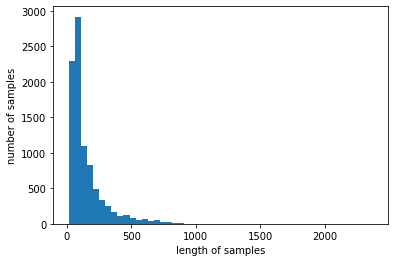

In [213]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

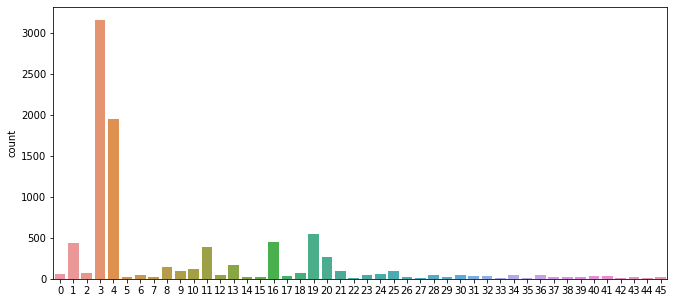

In [214]:
fig, axe = plt.subplots()
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

In [215]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수:")
#copy=True가 기본값이지만, asarray의 경우 copy=False가 기본값
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


In [216]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [218]:
index_to_word = { index+3 : word for word, index in word_index.items() }
sorted(index_to_word)

[4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187

In [219]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token
sorted(index_to_word)

[0,
 1,
 2,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [221]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


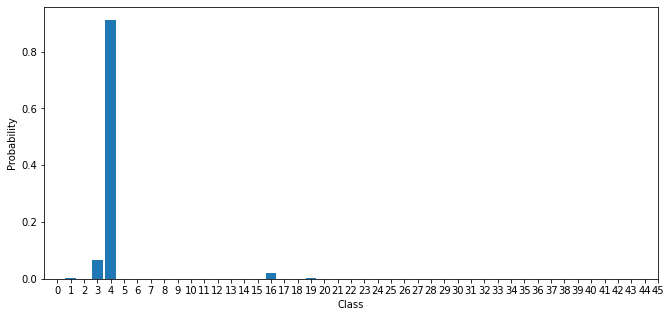

In [232]:
probability_3 = model.predict_proba(tfidfv_test[3])[0]

plt.rcParams["figure.figsize"] = (11,5)
plt.bar(model.classes_, probability_3)
plt.xlim(-1, 21)
plt.xticks(model.classes_)
plt.xlabel("Class")
plt.ylabel("Probability")
plt.show()

In [233]:
model.predict(tfidfv_test[3])

array([4])

### CODE

In [60]:
import tensorflow as tf
import seaborn as sns
import sklearn
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.naive_bayes import ComplementNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score, f1_score, classification_report 

In [40]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)

In [41]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
index_to_word = { index+3 : word for word, index in word_index.items() }
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token

In [42]:
def get_decode_data(data, index_to_word):
    tmp_lst = []
    for d in data:
        decoded = ' '.join([index_to_word[index] for index in d])
        tmp_lst.append(decoded)
    return tmp_lst 

In [43]:
x_train = get_decode_data(x_train, index_to_word)
x_test = get_decode_data(x_test, index_to_word)

In [44]:
print(len(x_train),len(x_test))

8982 2246


### 다양한 머신러닝 모델 사용해보기 

In [110]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [111]:
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import accuracy_score, f1_score

In [112]:
def update_csv(filename='Feb27_results.csv'):
    df = pd.DataFrame(res)
    df.to_csv(filename, index=False)
    print('complete')

In [113]:
def evaluate_model(model, model_name ,X_train, y_train, X_test, y_test, res):
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    accuracy = accuracy_score(y_test, predicted)
    f1_scores= f1_score(y_test, predicted, average='weighted')
    print(f'<< Model:{model_name} >>')
    print("Acc:", accuracy)
    print("F1-score:", f1_scores)
    
    report = classification_report(y_test, predicted, zero_division=0)
#     print(report)

    res.append({
        'Number of Words': num_words,
        'Model': model_name,
        'Accuracy': accuracy,
        'F1-score': f1_scores,
    })

In [114]:
# Mutinomial Naive Bayes Classifieres
nb = MultinomialNB() 
# CNB
cb = ComplementNB() 
# Logistic Regression
lr = LogisticRegression(C=1000, penalty='l2', max_iter=1000, random_state=42)
# Linear SVM
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=1000, dual=False)
# Decision Tree
tree = DecisionTreeClassifier(max_depth=10, random_state=42) 
# RandomForest
forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
# Gradient Boosting Tree
grbt = GradientBoostingClassifier(random_state=42) # verbose=3 
# Voting
clf1 = LogisticRegression(penalty='l2', random_state=42)
clf2 = ComplementNB()
clf3 = GradientBoostingClassifier(random_state=42)
voting_classifier = VotingClassifier(
    estimators=[('lr', clf1), ('cnb', clf2), ('gnb', clf3)],
    voting='soft'
)

In [115]:
dtmvector = CountVectorizer()
tfidf_transformer = TfidfTransformer()
res = []
for num_words in [5000, 10000, None]:
    (x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=num_words, test_split=0.2)
    x_train = get_decode_data(x_train, index_to_word)
    x_test = get_decode_data(x_test, index_to_word)
    
    #데이터를 DTM으로 변환
    x_train_dtm = dtmvector.fit_transform(x_train)   
    x_test_dtm = dtmvector.transform(x_test)

    #DTM을 TF-IDF 행렬로 변환
    tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
    tfidfv_test = tfidf_transformer.transform(x_test_dtm) 
    
    print('******* Number of words ********:', num_words)
    evaluate_model(nb, 'Mutinomial Naive Bayes Classifier', tfidfv, y_train, tfidfv_test, y_test, res)
    evaluate_model(cb, 'Complement Naive Bayes Classifier', tfidfv, y_train, tfidfv_test, y_test, res)
    evaluate_model(lr, 'Logistic Regression', tfidfv, y_train, tfidfv_test, y_test, res)
    evaluate_model(lsvc, 'Linear SVM', tfidfv, y_train, tfidfv_test, y_test, res)
    evaluate_model(tree, 'Decision Tree', tfidfv, y_train, tfidfv_test, y_test, res)
    evaluate_model(forest, 'RandomForest', tfidfv, y_train, tfidfv_test, y_test, res)
    evaluate_model(grbt, 'Gradient Boosting Tree', tfidfv, y_train, tfidfv_test, y_test, res)
    evaluate_model(voting_classifier, 'Voting(LR,CNB,GBT)', tfidfv, y_train, tfidfv_test, y_test, res)
update_csv()      

******* Number of words ********: 5000
<< Model:Mutinomial Naive Bayes Classifier >>
Acc: 0.6731967943009796
F1-score: 0.6012501291711391
<< Model:Complement Naive Bayes Classifier >>
Acc: 0.7707034728406055
F1-score: 0.7458990404916549
<< Model:Logistic Regression >>
Acc: 0.8067675868210151
F1-score: 0.8009459132165937


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


<< Model:Linear SVM >>
Acc: 0.7742653606411398
F1-score: 0.7701316803248771
<< Model:Decision Tree >>
Acc: 0.6197684772929652
F1-score: 0.5745070748297587
<< Model:RandomForest >>
Acc: 0.5347284060552092
F1-score: 0.4156651315146318
<< Model:Gradient Boosting Tree >>
Acc: 0.7684772929652716
F1-score: 0.7675418126609685


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<< Model:Voting(LR,CNB,GBT) >>
Acc: 0.7951914514692787
F1-score: 0.7929870345760751
******* Number of words ********: 10000
<< Model:Mutinomial Naive Bayes Classifier >>
Acc: 0.6567230632235085
F1-score: 0.5764467518778252
<< Model:Complement Naive Bayes Classifier >>
Acc: 0.7707034728406055
F1-score: 0.7456682614453047
<< Model:Logistic Regression >>
Acc: 0.8125556544968834
F1-score: 0.8069136891585487


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


<< Model:Linear SVM >>
Acc: 0.7813891362422084
F1-score: 0.7763830099950612
<< Model:Decision Tree >>
Acc: 0.6219946571682992
F1-score: 0.5787746084604964
<< Model:RandomForest >>
Acc: 0.5253784505788067
F1-score: 0.397402975148663
<< Model:Gradient Boosting Tree >>
Acc: 0.7707034728406055
F1-score: 0.7664689841505945


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<< Model:Voting(LR,CNB,GBT) >>
Acc: 0.7983081032947462
F1-score: 0.7935713406786632
******* Number of words ********: None
<< Model:Mutinomial Naive Bayes Classifier >>
Acc: 0.5997328584149599
F1-score: 0.5045670886188423
<< Model:Complement Naive Bayes Classifier >>
Acc: 0.7649154051647373
F1-score: 0.7346534179503126
<< Model:Logistic Regression >>
Acc: 0.8161175422974176
F1-score: 0.8106000779130309


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


<< Model:Linear SVM >>
Acc: 0.7827248441674087
F1-score: 0.7792319431407437
<< Model:Decision Tree >>
Acc: 0.6202137132680321
F1-score: 0.575475166300307
<< Model:RandomForest >>
Acc: 0.4821905609973286
F1-score: 0.3549786270839152
<< Model:Gradient Boosting Tree >>
Acc: 0.7693677649154052
F1-score: 0.765950527236545


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<< Model:Voting(LR,CNB,GBT) >>
Acc: 0.802760463045414
F1-score: 0.7981929419864917
complete


### 1D-Conv

In [153]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=num_words, test_split=0.2)
x_train = get_decode_data(x_train, index_to_word)
x_test = get_decode_data(x_test, index_to_word)

#데이터를 DTM으로 변환
x_train_dtm = dtmvector.fit_transform(x_train)   
x_test_dtm = dtmvector.transform(x_test)

#DTM을 TF-IDF 행렬로 변환 (.toarray().astype('float32')필요!)
tfidfv = tfidf_transformer.fit_transform(x_train_dtm).toarray().astype('float32')
tfidfv_test = tfidf_transformer.transform(x_test_dtm).toarray().astype('float32') 

In [169]:
tfidfv.shape

(8982, 4867)

### Average number of sparse in each data

In [178]:
zero_counts = []
for row in tfidfv:
    zero_count = np.sum(row == 0)
    zero_counts.append(zero_count)
np.mean(zero_counts)


4793.961812513917

In [193]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import f1_score
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

dtmvector = CountVectorizer()
tfidf_transformer = TfidfTransformer()
res = []
for num_words in [5000, 10000, None]:
    (x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=num_words, test_split=0.2)
    x_train = get_decode_data(x_train, index_to_word)
    x_test = get_decode_data(x_test, index_to_word)
    
    #데이터를 DTM으로 변환
    x_train_dtm = dtmvector.fit_transform(x_train)   
    x_test_dtm = dtmvector.transform(x_test)

    #DTM을 TF-IDF 행렬로 변환 (.toarray().astype('float32')필요!)
    tfidfv = tfidf_transformer.fit_transform(x_train_dtm).toarray().astype('float32')
    tfidfv_test = tfidf_transformer.transform(x_test_dtm).toarray().astype('float32') 

    # TruncatedSVD 사용
    svd = TruncatedSVD(n_components=100) 
    tfidfv_reduced = svd.fit_transform(tfidfv)
    tfidfv_test_reduced = svd.transform(tfidfv_test)
    
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(tfidfv_reduced.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(46, activation='softmax')
    ])


    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])

    # 학습
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    model.fit(tfidfv_reduced, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

    # 예측
    y_pred = model.predict(tfidfv_test_reduced)
    y_pred_classes = np.argmax(y_pred, axis=1)
    accuracy = np.mean(y_pred_classes == y_test)
    f1 = f1_score(y_test, y_pred_classes, average='weighted')

    print(f"Num Words: {num_words}, Accuracy: {accuracy}, F1-score: {f1}")

Epoch 1/10
225/225 [==============================] - 1s 3ms/step - loss: 2.1100 - accuracy: 0.5322 - val_loss: 1.4162 - val_accuracy: 0.6772
Epoch 2/10
225/225 [==============================] - 1s 2ms/step - loss: 1.2410 - accuracy: 0.7184 - val_loss: 1.1202 - val_accuracy: 0.7368
Epoch 3/10
225/225 [==============================] - 1s 2ms/step - loss: 1.0288 - accuracy: 0.7599 - val_loss: 1.0010 - val_accuracy: 0.7735
Epoch 4/10
225/225 [==============================] - 1s 2ms/step - loss: 0.9273 - accuracy: 0.7801 - val_loss: 0.9483 - val_accuracy: 0.7774
Epoch 5/10
225/225 [==============================] - 1s 2ms/step - loss: 0.8692 - accuracy: 0.7884 - val_loss: 0.9223 - val_accuracy: 0.7846
Epoch 6/10
225/225 [==============================] - 1s 2ms/step - loss: 0.8275 - accuracy: 0.7947 - val_loss: 0.8813 - val_accuracy: 0.7958
Epoch 7/10
225/225 [==============================] - 1s 2ms/step - loss: 0.7952 - accuracy: 0.8049 - val_loss: 0.8579 - val_accuracy: 0.7986
Epoch 

- Tree based model에서 Number of words(Now)과 무관하게 성능이 안좋았음
- Baysian모델 (CNB, MNB)에서는 Now가 가장 작을 경우 F-1 score가 가장 좋았고
- 반면 그 외 모델(tree기반 제외)에서는 단어의 수가 가장 많을때 성능이 좋았음

- DNN기반 (Conv1D, RNN)에서 학습이 제대로 진행되지 않아 sparse부분을 줄이고 진행하였으나, 해결되지 않음